In [ ]:
import sys

sys.path.append('/path/to/search')

In [ ]:
from Sample import Sample
import matplotlib.pyplot as plt
from segmentation.segmentation import Segmentation
from skimage.segmentation import find_boundaries

In [ ]:
# Load the sample from the respective directory
sample_directory = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/Multimodal_Imaging_Daria/_tmp_simon/20211214_18-2600_BM"
example = Sample(sample_directory)

In [ ]:
# Take a ROI from the ROI-List
roi = example.rois[0]

In [ ]:
# Initialize the Segmentation Class with thre correct resolution
Mesmer = Segmentation("mesmer", mpp=0.175)

In [ ]:
# Segment the IF DAPI Image
masks = Mesmer(roi.if_nuc)

In [103]:
# lets look at the masks
rgb_data = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
boundaries = np.zeros_like(img)
overlay_data = np.copy(rgb_data)

boundary = find_boundaries(masks, connectivity=0, mode='outer')
boundaries[boundary > 0] = 1

overlay_data[boundaries > 0] = (255,0,0)

plt.rcParams["figure.figsize"] = (20, 20)
plt.imshow(overlay_data)


0 hot pixels found.
0 hot pixels found.
Found 1452 matches.
0 hot pixels found.
0 hot pixels found.
Found 529 matches.
0 hot pixels found.
0 hot pixels found.
Found 1710 matches.
0 hot pixels found.
0 hot pixels found.
Found 434 matches.


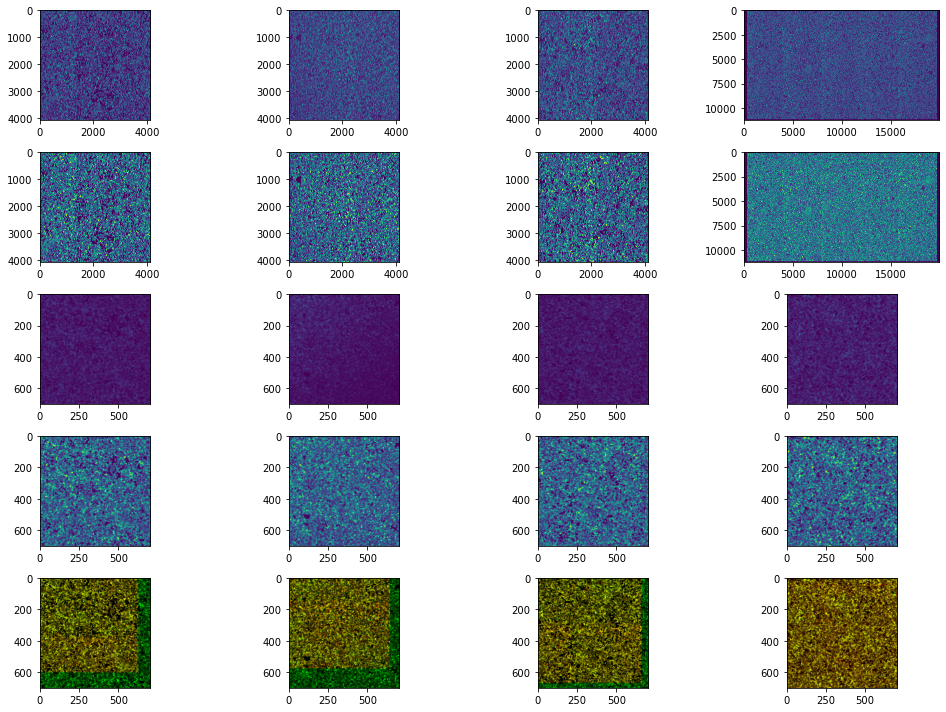

In [104]:
# hier noch schauen mit dem Registration, dass der Output hier nicht 700 x 700 sondern 4096 auf 4096 ist, einfach vor der registrierung das IMC bild upskalieren und dann darafu registrieren aber nicht speichern.

import matplotlib.pyplot as plt
import preprocessing.preprocess as pp
import registration.register as reg
from Sample import Sample
from utils import additive_blend
import numpy as np


fig, ax = plt.subplots(5, len(example.rois), figsize=(15, 10))


for i, roi in enumerate(example.rois):

    pp_if = pp.preprocess(roi.if_nuc)
    pp_imc = pp.preprocess(roi.imc_nuc)

    ax[0, i].imshow(roi.if_nuc)
    ax[1, i].imshow(pp_if)
    ax[2, i].imshow(roi.imc_nuc)
    ax[3, i].imshow(pp_imc)

    h = reg.find_matches(pp_if, pp_imc)
    transformed = reg.transform(pp_if, pp_imc, h)
    ax[4, i].imshow(additive_blend(transformed, pp_imc))

    plt.tight_layout()


plt.show()